In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import glob
from windrose import WindroseAxes


# Data processing

## Loading and visualising data

In [2]:
IWV = xr.open_mfdataset('IWV/*.nc')
LWP = xr.open_mfdataset('LWP/*.nc')
MET = xr.open_mfdataset('MET/*.nc')
TPC = xr.open_mfdataset('TPC/*.nc')
HPC = xr.open_mfdataset('HPC/*.nc')
SPC = xr.open_mfdataset('SPC/*.nc')
DAVIS = xr.open_mfdataset('DAVIS/*.nc')

In [3]:
BLH_19 = xr.open_mfdataset('BLH/240619.BLH.nc')

In [4]:
files = glob.glob('BLH/*.NC')

# Define a function to sort the dataset by time
def preprocess(ds):
    return ds.sortby('time')

# Open multiple files and apply preprocessing
BLH = xr.open_mfdataset(files, preprocess=preprocess)

In [5]:
TPC

<xarray.Dataset>
Dimensions:           (time: 3782, altitude_layer: 93)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-2...
Dimensions without coordinates: altitude_layer
Data variables: (12/14)
    file_code         (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID            (time) int32 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor          (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    integration_time  (time) int32 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    retrieval         (time) int32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    RF                (time) int32 dask.array<chunksize=(97,), meta=np.ndarray>
    ...                ...
    azimuth           (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    right_ascension   (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    declination       (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    min_T             (time) float32 221.0 221.0 221.0 ... 225.7 225.7 225.7
    max_T             (time) float32 287.9 287.9 287.9 ... 287.9 287.9 287.9
    T_prof            (time, altitude_layer) float32 dask.array<chunksize=(97, 93), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [6]:
MET

<xarray.Dataset>
Dimensions:            (time: 264070)
Coordinates:
  * time               (time) datetime64[ns] 2024-06-17T22:00:19 ... 2024-06-...
Data variables: (12/23)
    file_code          (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID             (time) int32 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor           (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    IntSampCnt         (time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    Min_P              (time) float32 1.014e+03 1.014e+03 ... 1.014e+03
    Max_P              (time) float32 1.014e+03 1.014e+03 ... 1.017e+03
    ...                 ...
    Min_WD             (time) float32 93.0 93.0 93.0 93.0 ... 0.0 0.0 0.0 0.0
    Max_WD             (time) float32 253.0 253.0 253.0 ... 357.0 357.0 357.0
    Surf_WD            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
    Min_RR             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maximum_Rain_Rate  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Surf_RR            (time) float32 dask.array<chunksize=(6841,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [7]:
IWV

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_IWV     (time) float32 16.43 16.43 16.43 16.43 ... 21.53 21.53 21.53
    Max_IWV     (time) float32 18.44 18.44 18.44 18.44 ... 24.46 24.46 24.46
    IWV         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [8]:
LWP

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_LWP     (time) float32 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    Max_LWP     (time) float32 7.088 7.088 7.088 7.088 ... 97.89 97.89 97.89
    LWP         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [9]:
HPC.time[-1]

<xarray.DataArray 'time' ()>
array('2024-06-21T07:38:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-06-21T07:38:15
Attributes:
    long_name:  sample time
    comment:    time is UTC

In [10]:
indexer_17 = (MET.time >= pd.Timestamp("2024-06-17")) & (MET.time < pd.Timestamp("2024-06-18"))
indexer_18 = (MET.time >= pd.Timestamp("2024-06-18")) & (MET.time < pd.Timestamp("2024-06-19"))
indexer_19 = (MET.time >= pd.Timestamp("2024-06-19")) & (MET.time < pd.Timestamp("2024-06-20"))
indexer_20 = (MET.time >= pd.Timestamp("2024-06-20")) & (MET.time < pd.Timestamp("2024-06-21"))

# Boundary Layer Measurements

Text(0, 0.5, 'BLH [m]')

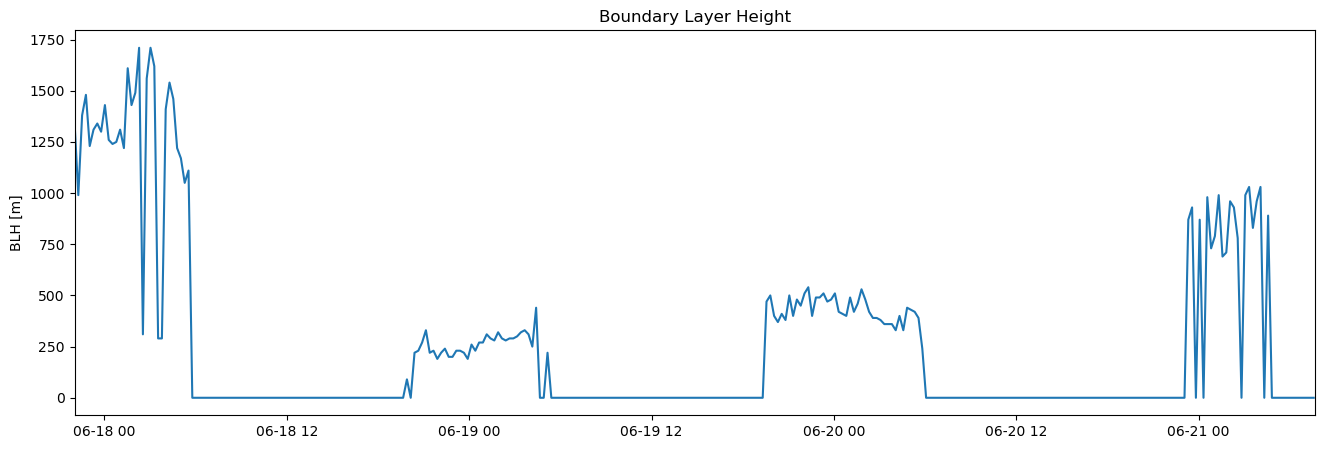

In [11]:
plt.figure(figsize=(16,5))
plt.plot(BLH.time,BLH.BLH)
plt.xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
plt.title('Boundary Layer Height')
plt.ylabel('BLH [m]')


(19893.0, 19894.0)

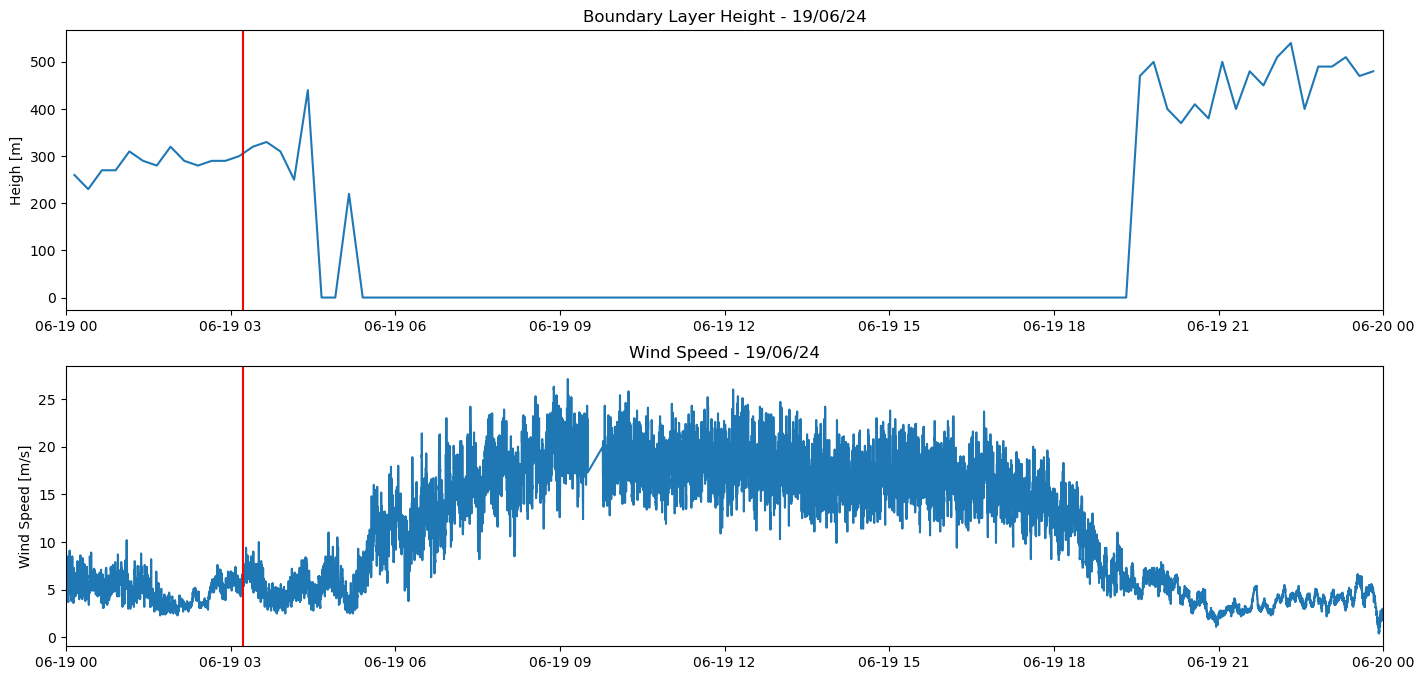

In [12]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.plot(BLH_19.time, BLH_19.BLH)
ax1.set_title('Boundary Layer Height - 19/06/24')
ax1.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red')
ax1.set_ylabel('Heigh [m]')
ax1.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))


MET_19= MET.sel(time = indexer_19)

ax2.plot(MET_19.time, MET_19.Surf_WS)
ax2.set_title('Wind Speed - 19/06/24')
ax2.axvline(pd.Timestamp('2024-06-19T03:14:00'), color='red')
ax2.set_ylabel('Wind Speed [m/s]')
ax2.set_xlim(pd.Timestamp("2024-06-19"), pd.Timestamp("2024-06-20"))


# Liquid Water Cloud

In [13]:
mask = (TPC.T_prof > 272.8) & (TPC.T_prof < 273.3)
melting_altitude = TPC.altitude.where(mask)

melting_heights = melting_altitude.values
non_nan_indices = np.where(~np.isnan(melting_heights))          ## the temperature interval is not met 
                                                                ##at all timestamps, so we need to keep where 
                                                                # it is not nan for plotting (there use melting_altitude.time[non_nan_indices[0]])
melting_heights = melting_heights[~np.isnan(melting_heights)]

Text(0, 0.5, 'Altitude [m]')

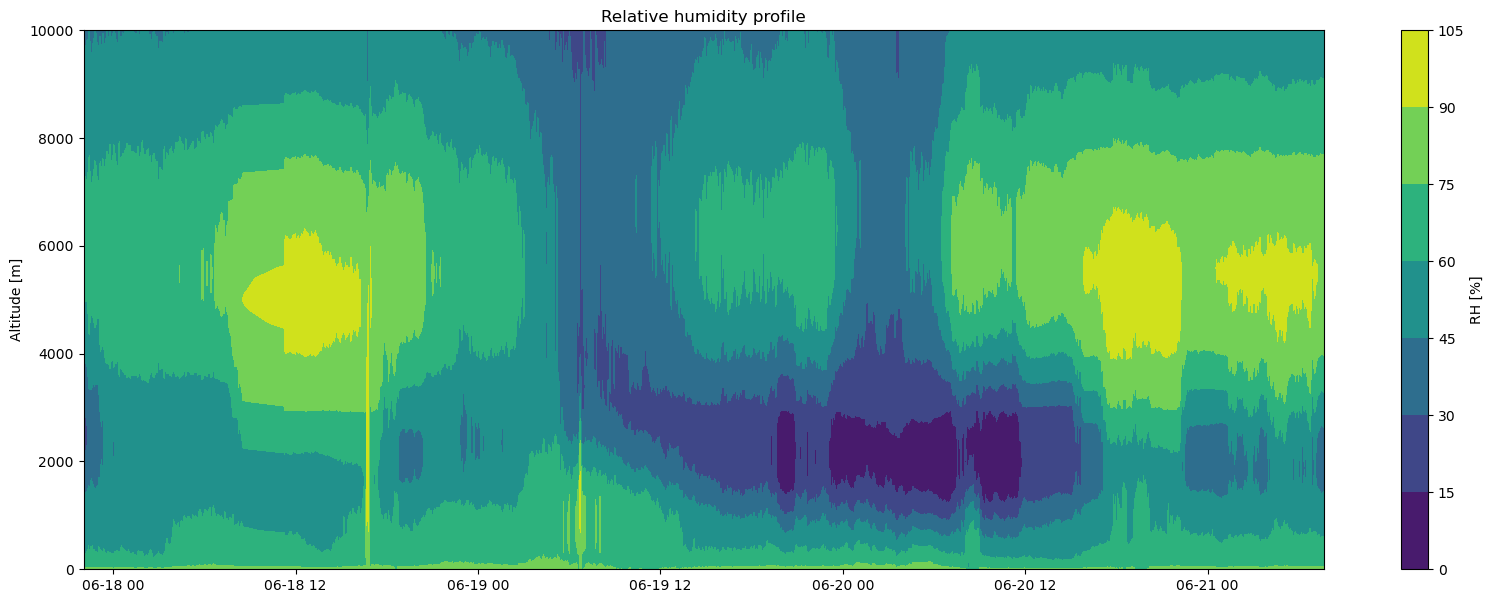

In [14]:
fig,ax = plt.subplots(1,figsize=(20,7))
contour = ax.contourf(HPC.time, HPC.altitude[1], HPC.RH_prof.T)
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('RH [%]')
ax.set_title('Relative humidity profile')
ax.set_ylabel('Altitude [m]')

(19891.918877314816, 19895.318229166667)

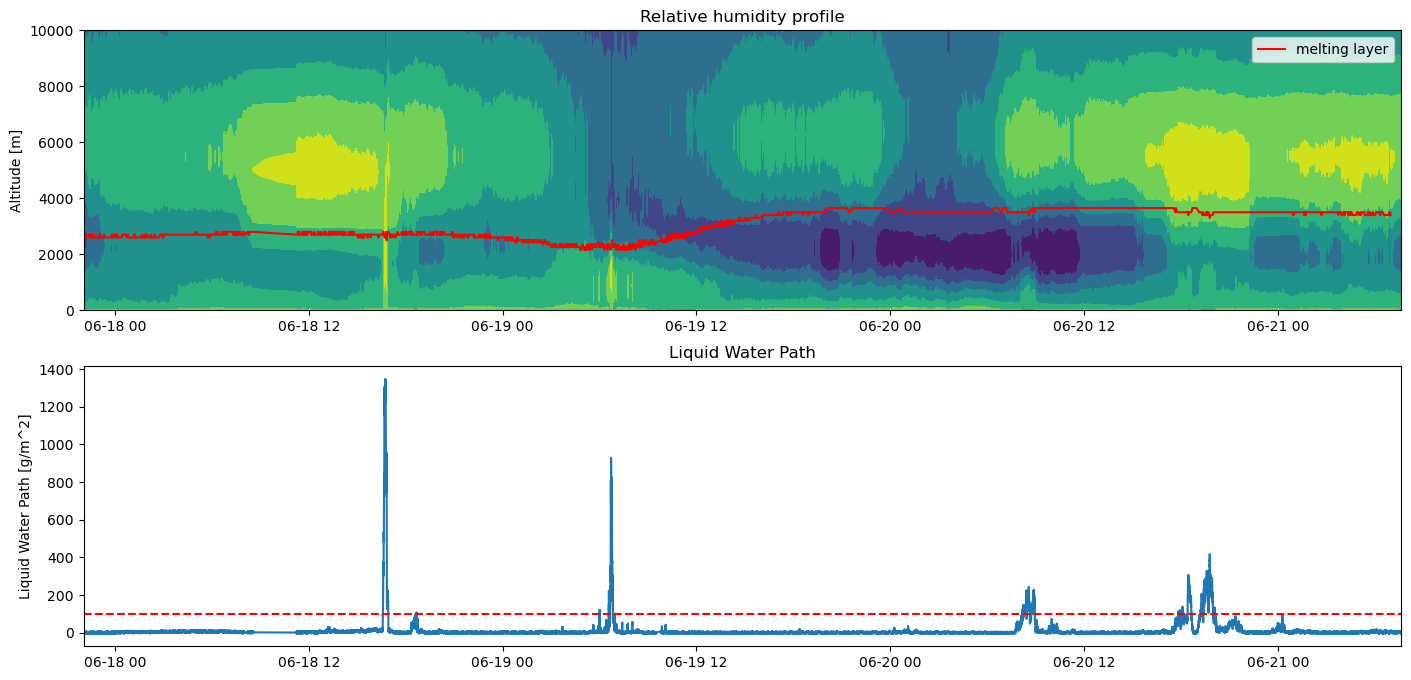

In [15]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.contourf(HPC.time, HPC.altitude[1], HPC.RH_prof.T)
ax1.set_title('Relative humidity profile')
ax1.set_ylabel('Altitude [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax1.plot(melting_altitude.time[non_nan_indices[0]],melting_heights, color = 'red', label = 'melting layer')
ax1.legend()

ax2.plot(LWP.time, LWP.LWP)
ax2.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax2.set_ylabel('Liquid Water Path [g/m^2]')
ax2.set_title('Liquid Water Path')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))

In [32]:
liquid_wc = HPC.RH_prof.where(HPC.RH_prof > 80)
liquid_wc

<xarray.DataArray 'RH_prof' (time: 3813, altitude_layer: 93)>
dask.array<where, shape=(3813, 93), dtype=float32, chunksize=(1166, 93), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-21T07:38:15
Dimensions without coordinates: altitude_layer
Attributes:
    long_name:  relative humidity profiles
    units:      %

(19891.918877314816, 19895.318229166667)

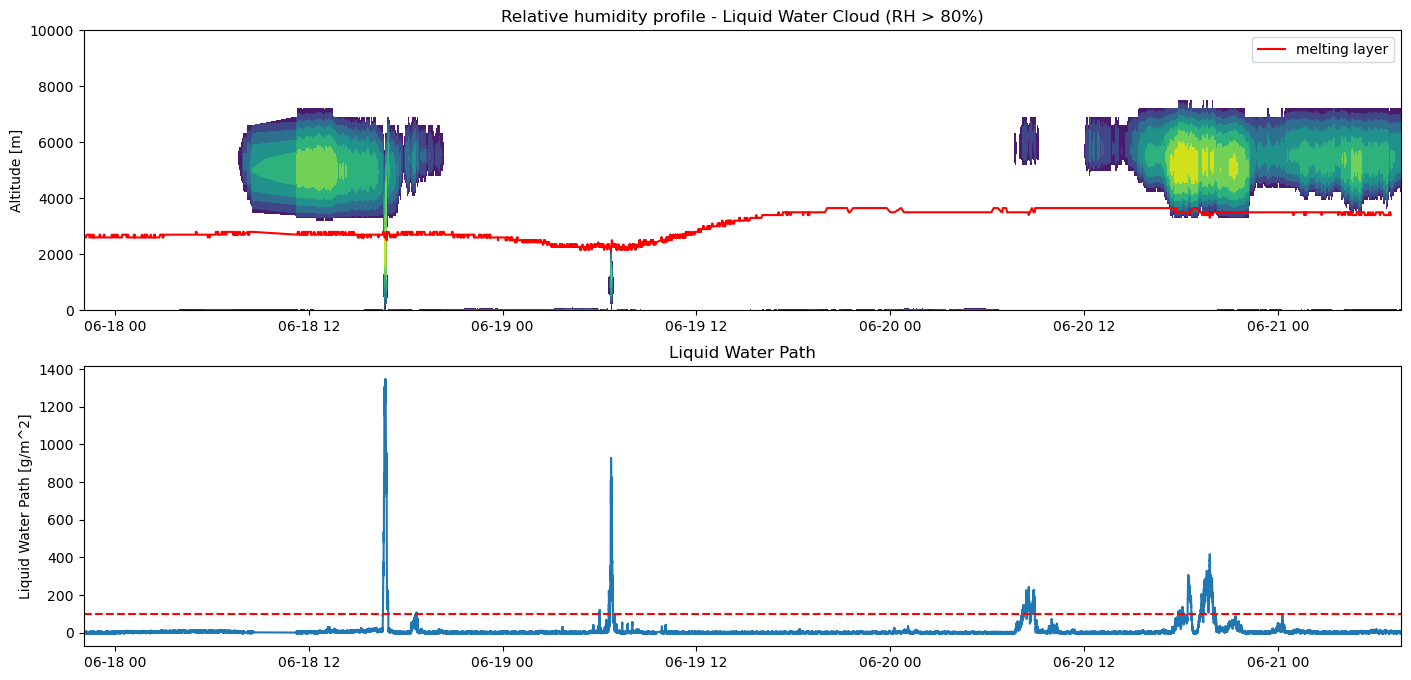

In [37]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(17,8))

ax1.contourf(HPC.time, HPC.altitude[1], liquid_wc.T)
ax1.set_title('Relative humidity profile - Liquid Water Cloud (RH > 80%)')
ax1.set_ylabel('Altitude [m]')
ax1.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))
ax1.plot(melting_altitude.time[non_nan_indices[0]],melting_heights, color = 'red', label = 'melting layer')
ax1.legend()

ax2.plot(LWP.time, LWP.LWP)
ax2.axhline(100,color='red',linestyle='--', label = '100 g/m^2')
ax2.set_ylabel('Liquid Water Path [g/m^2]')
ax2.set_title('Liquid Water Path')
ax2.set_xlim(pd.Timestamp("2024-06-17T22:03:11.000000000"), pd.Timestamp("2024-06-21T07:38:15.000000000"))

# Wind Direction

MET.Surf_WS.plot()

In [16]:
## choosing the same time as the one available from the DAVIS
indexer = (MET['time'] > np.datetime64('2024-06-18T16:00:00.000000000')) & (MET['time'] < np.datetime64('2024-06-20T16:30:00.000000000'))
indexer = indexer.compute()
wstn_speeds = MET.where(indexer, drop=True)
wstn_speeds

<xarray.Dataset>
Dimensions:            (time: 162339)
Coordinates:
  * time               (time) datetime64[ns] 2024-06-18T16:00:01 ... 2024-06-...
Data variables: (12/23)
    file_code          (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    Rad_ID             (time) float64 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    RSFactor           (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    IntSampCnt         (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    Min_P              (time) float32 1.014e+03 1.014e+03 ... 1.017e+03
    Max_P              (time) float32 1.016e+03 1.016e+03 ... 1.024e+03
    ...                 ...
    Min_WD             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Max_WD             (time) float32 359.0 359.0 359.0 ... 358.0 358.0 358.0
    Surf_WD            (time) float32 dask.array<chunksize=(24433,), meta=np.ndarray>
    Min_RR             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maximum_Rain_Rate  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Surf_RR            (time) float32 dask.array<chunksize=(24433,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

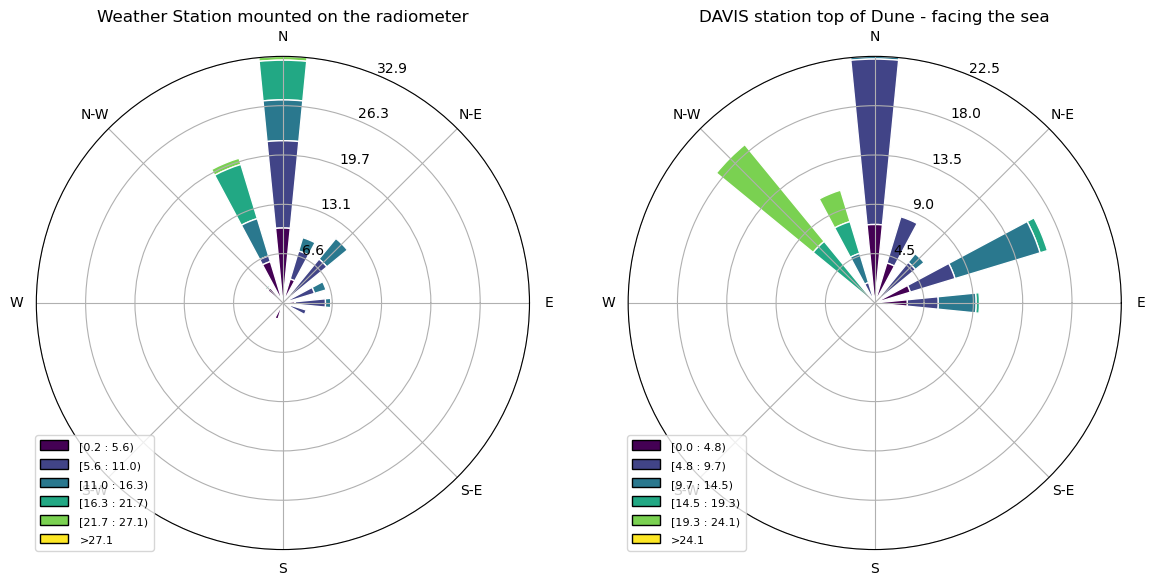

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection='windrose'), figsize=(14, 7))

ax1.bar(wstn_speeds.Surf_WD,wstn_speeds.Surf_WS, normed=True, opening=0.5, edgecolor='white')
ax1.set_legend()
ax1.set_title('Weather Station mounted on the radiometer')

ax2.bar(DAVIS.windDir,(DAVIS.windSpeed)*3.6, normed=True, opening=0.5, edgecolor='white')
ax2.set_legend()
ax2.set_title('DAVIS station top of Dune - facing the sea')
plt.show()

Text(0, 0.5, 'Wind Speed [m/s]')

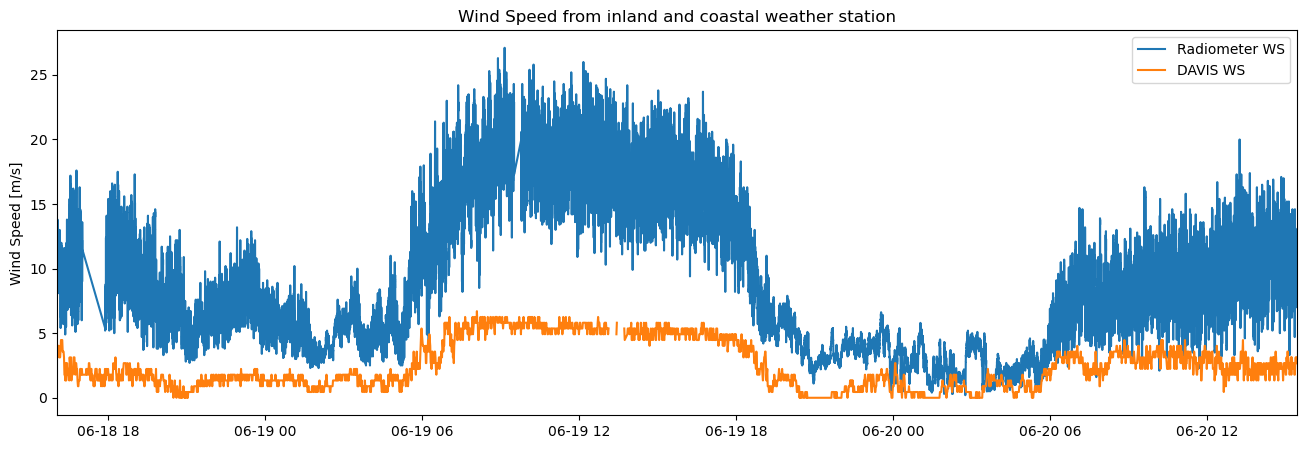

In [45]:
plt.figure(figsize=(16,5))
plt.plot(wstn_speeds.time, wstn_speeds.Surf_WS, label='Radiometer WS')
plt.plot(DAVIS.time, DAVIS.windSpeed, label = 'DAVIS WS')
plt.legend()
plt.title('Wind Speed from inland and coastal weather station')
plt.xlim(pd.Timestamp("2024-06-18T16:02:00.000000000"), pd.Timestamp("2024-06-20T15:26:00.000228881"))
plt.ylabel('Wind Speed [m/s]')